In [28]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
from scipy import stats

%matplotlib inline

In [4]:
dframe = pd.read_csv('innermelbourne.csv')
dframe.columns = dframe.columns.str.strip()

In [5]:
#Dropping columns deemed irrelevant
aframe = dframe.drop(['gcc_name11','gcc_code11','sa2_5dig11','sa1_7dig11','sa3_code11','sa4_code11','ste_code11','ste_name11'],axis=1)

In [6]:
aframe

,sa1_main11,sa2_name11,sa3_name11,sa4_name11,Connectivity,Area,Connections,LUM_Residential,LUM_Industrial,LUM_Commercial,LUM_Parkland,LUM_Education,LandUseMixMeasure,AverageDensity,Connectivity_ZScore,AverageDensity_ZScore,LandUseMixMeasure_ZScore,SumZScore
0,20602111008,Alphington - Fairfield,Darebin - South,Melbourne - Inner,91.879768,206791.990003,19,184936.460899,21855.529104,0.000000,0.000000,0.000000,0.209642,38.126245,-1.089897,-0.608101,-0.639684,-2.337682
1,20604112615,Southbank,Melbourne City,Melbourne - Inner,259.133836,239258.605003,62,60400.955144,90046.798515,71836.844799,0.000000,13341.245830,0.771248,530.953591,1.708208,6.698707,2.031466,10.438381
2,20601110506,Brunswick,Brunswick - Coburg,Melbourne - Inner,158.203056,158024.760003,25,137264.639729,4251.295867,16508.824406,0.000000,0.000000,0.283073,50.611851,0.019669,-0.422985,-0.290425,-0.693741
3,20606113726,South Yarra - East,Stonnington - West,Melbourne - Inner,221.362924,216838.480003,48,188083.687656,0.000000,28299.009787,455.782559,0.000000,0.249847,73.256862,1.076313,-0.087244,-0.448455,0.540615
4,20606113730,South Yarra - East,Stonnington - West,Melbourne - Inner,220.035492,168154.690002,37,93364.876134,0.000000,66634.245431,7683.452945,472.115493,0.528749,103.160862,1.054106,0.356122,0.878074,2.288302
5,20606113731,South Yarra - East,Stonnington - West,Melbourne - Inner,195.702541,148184.075002,29,119368.586605,0.000000,18128.866818,2078.318812,8608.302765,0.407831,79.368598,0.647023,0.003371,0.302957,0.953352
6,20606113801,Toorak,Stonnington - West,Melbourne - Inner,194.359548,195513.935003,38,163129.946932,0.000000,32383.988070,0.000000,0.000000,0.278916,54.811069,0.624556,-0.360726,-0.310199,-0.046369
7,20606113802,Toorak,Stonnington - West,Melbourne - Inner,177.451647,123977.435002,22,108761.981822,0.000000,10369.847354,4845.605825,0.000000,0.279052,57.936518,0.341692,-0.314388,-0.309552,-0.282247
8,20606113803,Toorak,Stonnington - West,Melbourne - Inner,172.536913,168079.975002,29,159596.192109,0.000000,0.000000,3825.156012,4658.626881,0.145798,50.671513,0.259470,-0.422101,-0.943341,-1.105971
9,20606113804,Toorak,Stonnington - West,Melbourne - Inner,120.016178,99986.520001,12,93045.280568,0.000000,0.000000,0.000000,6941.239433,0.156664,32.748246,-0.619184,-0.687837,-0.891660,-2.198682


In [7]:
#Group by SA2 suburb
avg_sa2 = aframe[['sa2_name11','SumZScore']].groupby('sa2_name11').mean().round(3)

#Group by SA3 area
avg_sa3 = aframe[['sa3_name11','SumZScore']].groupby('sa3_name11').mean().round(3)

In [8]:
#avg_sub.loc[avg_sub['sa2_name11']=='Carlton']
avg_sa2.columns
avg_sa2.reset_index(inplace=True)
avg_sa3.reset_index(inplace=True)

In [9]:
avg_sa3.columns=['Region','Walkability Index']
avg_sa2.columns= ['Region','Walkability Index']

In [10]:
#minmax_scaler = preprocessing.MinMaxScaler()
#print minmax_scaler.fit_transform(avg_sa3['SumZScore'])*100

In [11]:
#Plotting the sa3 suburb scores, also normalising the scores using min max scaler
from bokeh.charts import Bar
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource    


output_notebook()

source = ColumnDataSource(avg_sa3)

# hover1 = HoverTool(
#     tooltips=[
#         ("Region","@sa3_name11"),
#         ("Walkability Score","@y")
#     ]
# )

p = Bar(avg_sa3, 'Region',values='Walkability Index', title="Inner Melbourne SA3 Walkability"\
        ,ylabel='Walkabiity Index',bar_width=0.7)
#p.y_range = Range1d(-5,15)
#p.yaxis.axis_label = "Walkability Score"

show(p)

Loading BokehJS ...

In [26]:
# avg_sa2.set_index('Region',inplace=True)

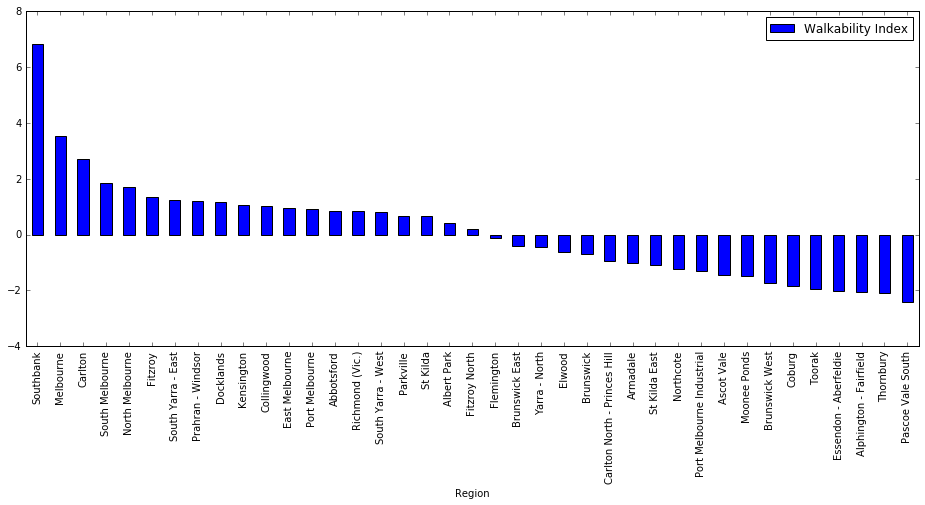

In [27]:
avg_sa2.sort_values('Walkability Index',ascending=False).plot(kind='bar',figsize=(16,6))

AttributeError: Unknown property figsize

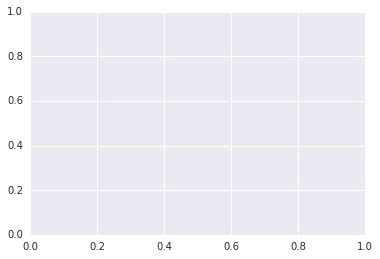

In [44]:
#Trying out seaborn
# sns.barplot(x='Region',y='Walkability Index',palette="Blues_d",figsize=(20,5),
#             data=avg_sa3.sort_values('Walkability Index',ascending=False))
